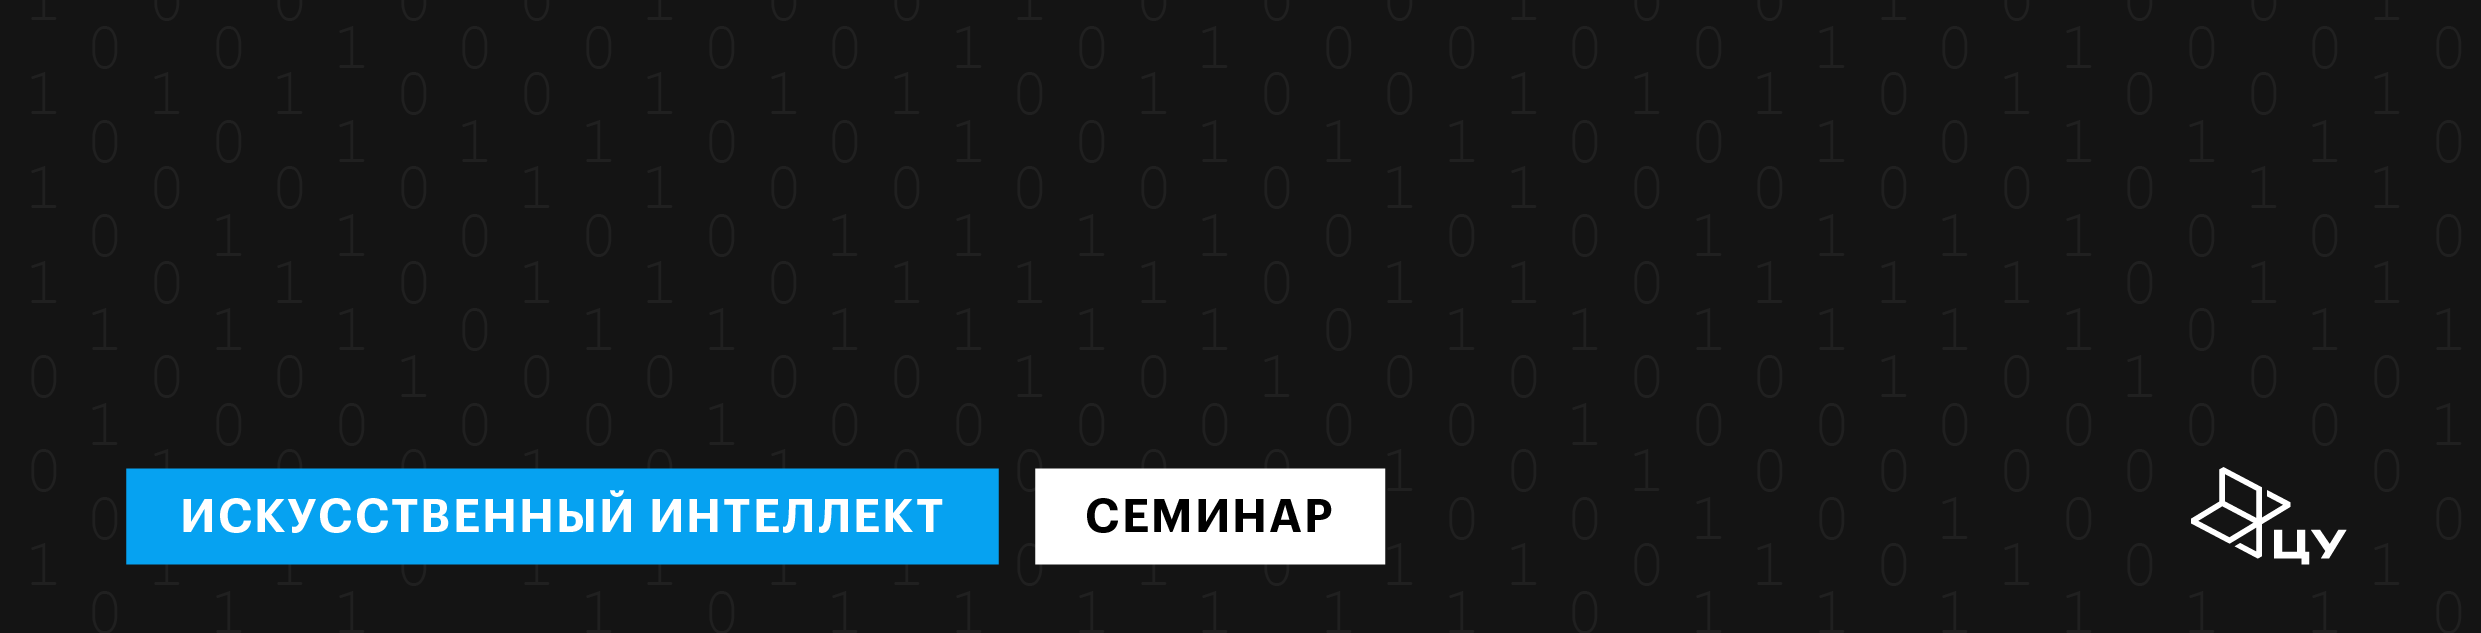

##Семинар по теме «Задачи с текстом»



Из этого текста ты узнаешь:
- как работать с открытыми языковыми моделями: GigaChat, YandexGPT, ChatGPT;
- что такое Promt Engeneering и как его использовать;
- как решать задачи классификации: TF-IDF, эмбеддинги из Gensim, Bert с HF.


##Знакомство с открытыми языковыми моделями

В этом разделе посмотрим:
* каким образом можно работать с LLM (Large Language Model), которые находятся в открытом доступе;
* как получить доступ через API к одной из моделей и использовать её в коде, а не в виде чата.

Перед тем как приступить к работе с LLM, важно уточнить три пункта:
1. Chat LLM — класс генеративных моделей, то есть при каждом обращении к чатовой модели ответ будет изменяться (если не задавать дополнительных условий — об этом мы поговорим позже). Повторные ответы могут содержать те же идеи и мысли, но как минимум слова и их порядок изменятся.

2. Так как модели генеративные, они могут и будут ошибаться в исторических фактах и именах. Это называется галлюцинацией. Языковая модель генерирует правдоподобный, а не верный с точки зрения фактов текст. То есть её основная задача — складно говорить. Таким образом, не стоит полностью полагаться на чат-модели, а все конкретные факты, сказанные ими, стоит дополнительно проверять.

3. Все сервисы, продемонстрированные в ноутбуке, и модели в них актуальны на середину марта 2025. На момент семинара модели, которые используются «под капотом» этих сервисов, могут быть улучшены. И тогда результаты генерации станут лучше, чем сохранено в ноутбуке. Но на семинаре будет производиться работа с актуальными моделями.

Приступим к изучению работы с LLM.

### GigaChat

GigaChat — большая языковая модель в виде чат-бота от «Сбера». Посмотрим, как с ней можно взаимодействовать.

Перейдём по ссылке: https://giga.chat/. Мы попали на стартовую страницу чат-бота. В окне «О чём поговорим?» можно писать произвольный текстовый запрос.

На момент марта 2025 на сайте доступна GigaChat Max — сильнейшая языковая модель от «Сбера».

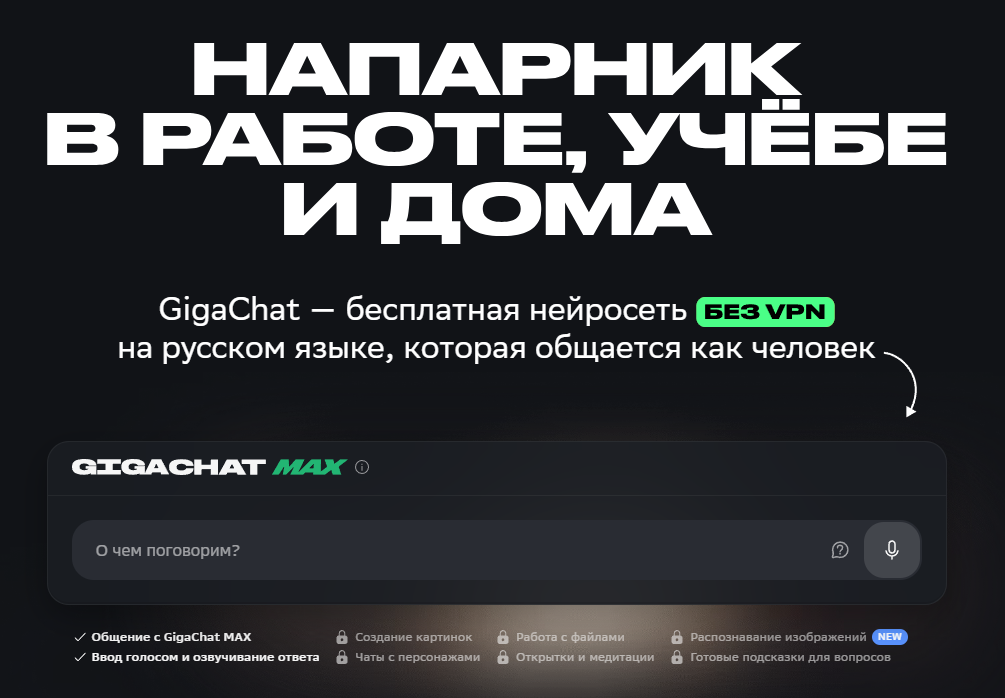

Попросим рассказать GigaChat историю Москвы.




**Вопрос:** «Расскажи мне про историю Москвы».

Позже мы зададим этот вопрос каждому сервису, чтобы сравнить их ответы. Ждём 15-20 секунд и получаем готовый ответ.


**Ответ:**
«История Москвы начинается с древнейших времён и насчитывает более 870 лет. Город был основан в XII веке, но его история уходит корнями ещё глубже.

Ранняя история

Первое упоминание о Москве встречается в летописи под 1147 годом, когда князь Юрий Долгорукий пригласил своего союзника новгород-северского князя Святослава Ольговича "на Москву". Это событие считается датой основания города. Однако археологические находки свидетельствуют о том, что поселение существовало здесь задолго до этого времени — уже в XI веке.

(Центральная часть ответа вырезана, при желании вы сможете самостоятельно прочесть сгенерированный текст.)

Во время Великой Отечественной войны Москва выдержала немецкую осаду и сыграла ключевую роль в победе над фашистской Германией. После войны город продолжал развиваться, становясь всё более современным и удобным для жизни.

Современная Москва

Сегодня Москва является крупнейшим городом России и одним из важнейших культурных, экономических и политических центров мира. Здесь сосредоточены основные государственные учреждения, крупные корпорации, научные центры и учебные заведения.

Город продолжает активно развиваться, строя новые объекты инфраструктуры, улучшая транспортную систему и создавая комфортные условия для жизни своих жителей».


**Вывод**: модель неплохо справилась с генерацией связного текста.

Это здорово, но как сохранить чат? Для этого существует полная версия модели. Чтобы ей воспользоватся, достаточно войти в свой «Сбер ID».


Какие дополнительные возможности становятся доступны?
1. Вся информация теперь сохраняется в виде чата.
2. В чат можно загружать файлы (PDF, TXT, DOC и другие) и картинки, а затем просить модель их прокомментировать или извлечь необходимую информацию.
3. Можно просить сгенерировать картинки по текстовому описанию.

#### 1. Сохранение чатов
Зададим модели снова вопрос про историю Москвы.

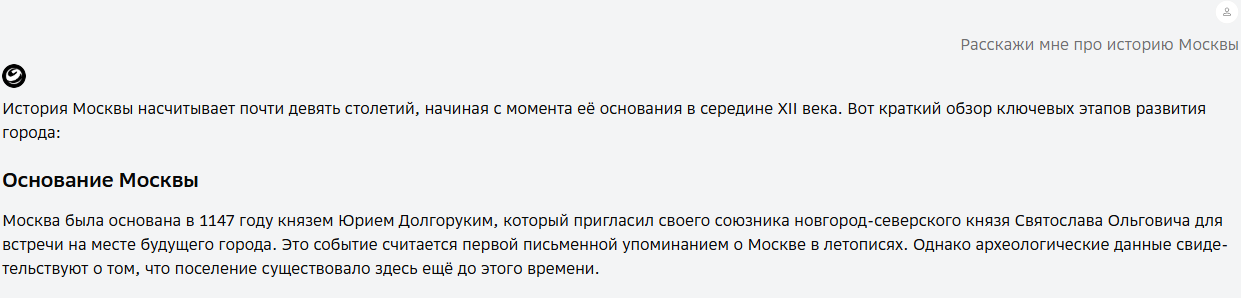

Это лишь часть ответа чат-модели, полный вывод будет рассмотрен на семинаре.

Теперь мы можем выйти из этого чата, нажав стрелочку «Назад» в левом верхнем углу страницы.

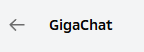

Мы окажемся на странице, где размещены все сохранённые чаты. Как правило, названия им даются автоматически, но при желании их можно переименовать.

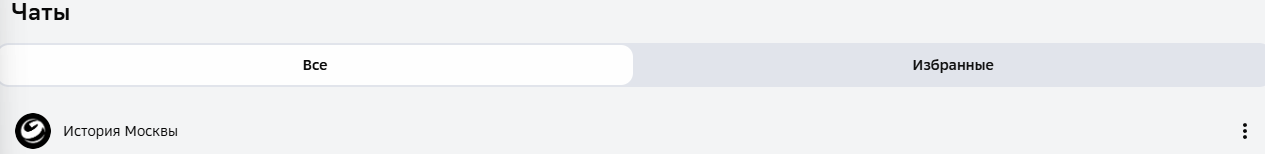

С GigaChat можно общаться и в телеграм-боте @gigachat_bot.
Он поддерживает функционал из версии в браузере. Единственный его недостаток — нельзя сохранять разные чаты. То есть, если вы сначала разговаривали с моделью про историю Москвы, а потом перешли к обсуждению домашнего задания, то вернуться к истории Москвы с той же точки, где закончили, уже не получится.

#### 2. Работа с файлами


Создадим новый чат, нажав на кнопку со скрина в левом нижнем углу страницы.

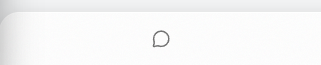

Загрузим в новый чат картинку и попросим описать, что на ней происходит.

**Промпт:** «Расскажи, что происходит на изображении».

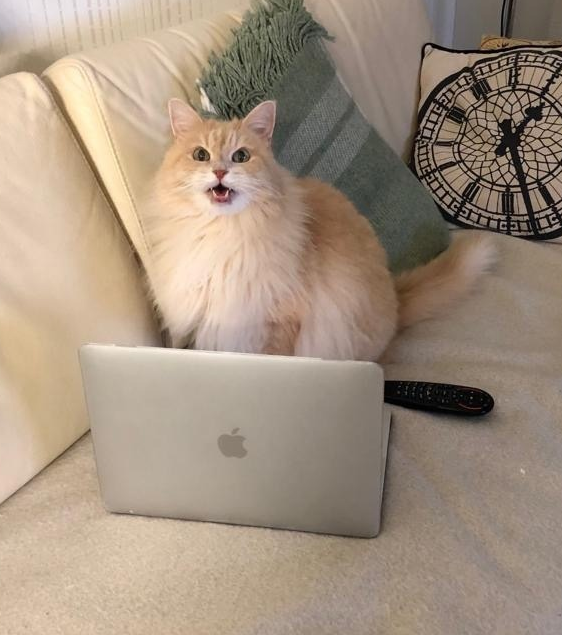

Ответ получается довольно точным.

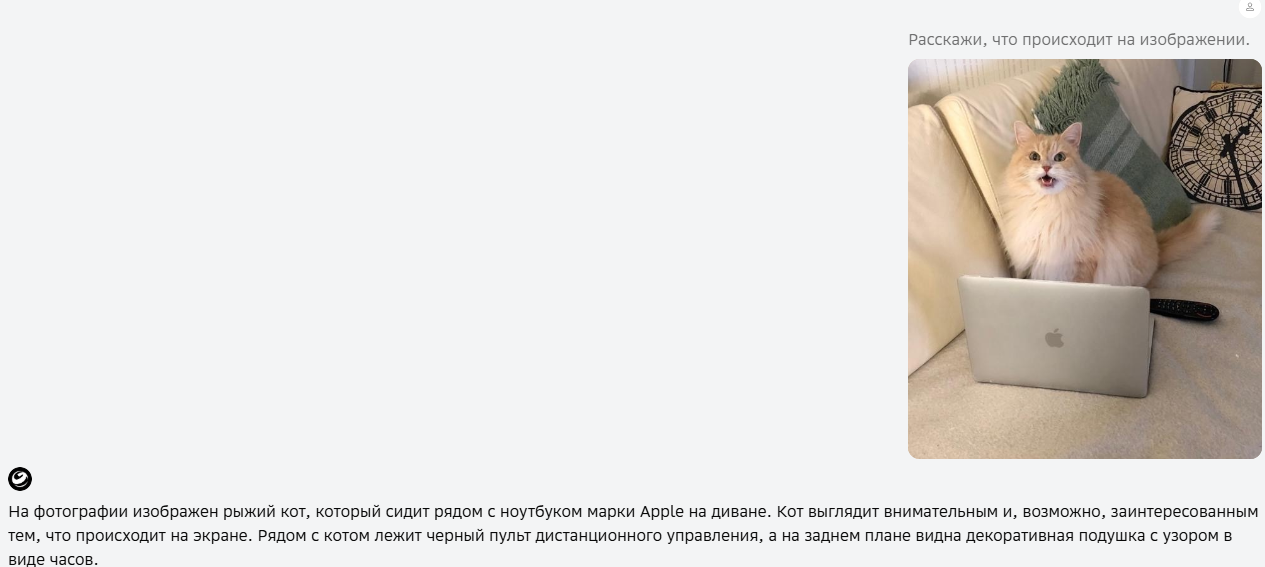

#### 3. Генерация картинок

Попросим модель сгенерировать изображение студента ЦУ.

**Запрос:**  «Нарисуй студента Центрального университета на семинаре курса "Искусственный интеллект", посвящённом языковым моделям».

Модель возвращает нам картинку:

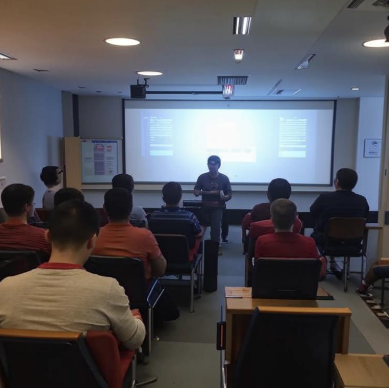

Выглядит неплохо. Но мы просили одного студента, а не целую аудиторию. Также не очень понятно, что курс посвящён искусственному интеллекту и языковым моделям.

Но в целом картинка получилась довольно высокого качества и в общих чертах отражает суть запроса. Перейдём к рассмотрению следующей модели.

### YandexGPT

YandexGPT — языковая модель от «Яндекса». Она также может быть использована в виде чата через сервис «Алиса». На март 2025 года «Яндекс» использует YandexGPT 4 для бесплатной версии и YandexGPT 5 для платной версии.

Перейдём по ссылке: https://alice.yandex.ru/.

«Алиса» также умеет генерировать картинки (только в Pro-режиме).


#### 1. Чат

Снова зададим вопрос про Москву.

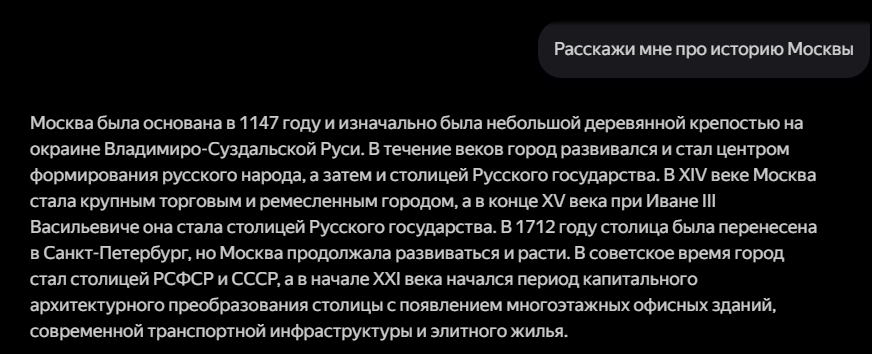

Как-то негусто... Возможно, это связано с тем, что мы используем бесплатную версию «Алисы». Можно перейти в режим «Алиса Pro» и сгенерировать ответ ещё раз.

Создадим новый чат с помощью кнопки на левой стороне страницы.

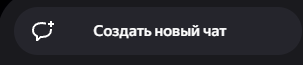

Выбираем «Алису Pro».

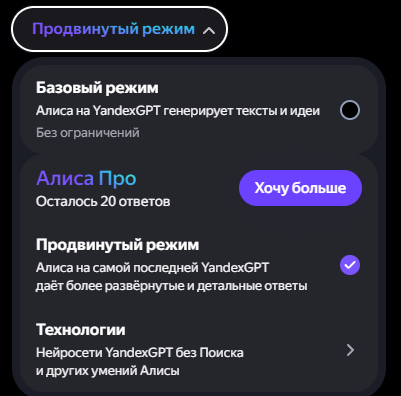

И пробуем ещё раз.

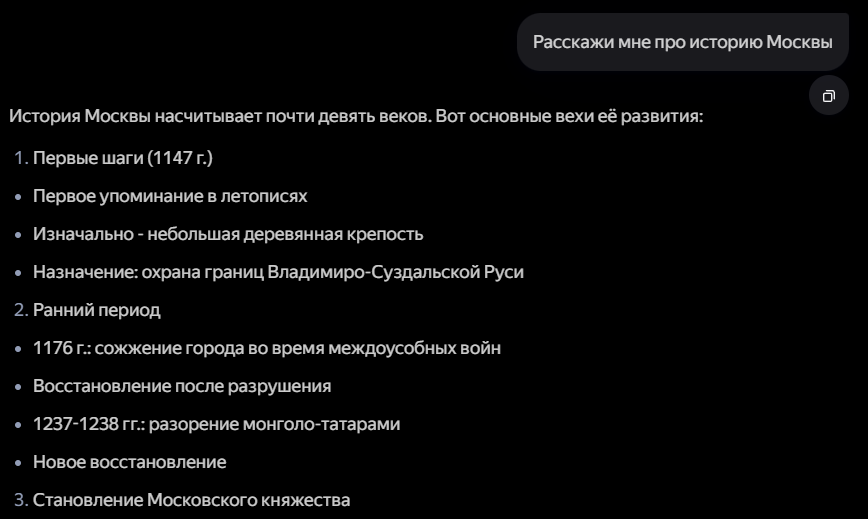

Модель вернула список основных исторических событий. Это действительно история Москвы, но в очень сжатом виде. Если хочешь получить что-то более подробное, то необходимо об этом в явном виде модель спрашивать.

#### 2. Генерация картинок

Генерировать картинки бесплатная версия не будет, но лимит на Pro-запросы мы не исчерпали, так что воспользуемся этим.


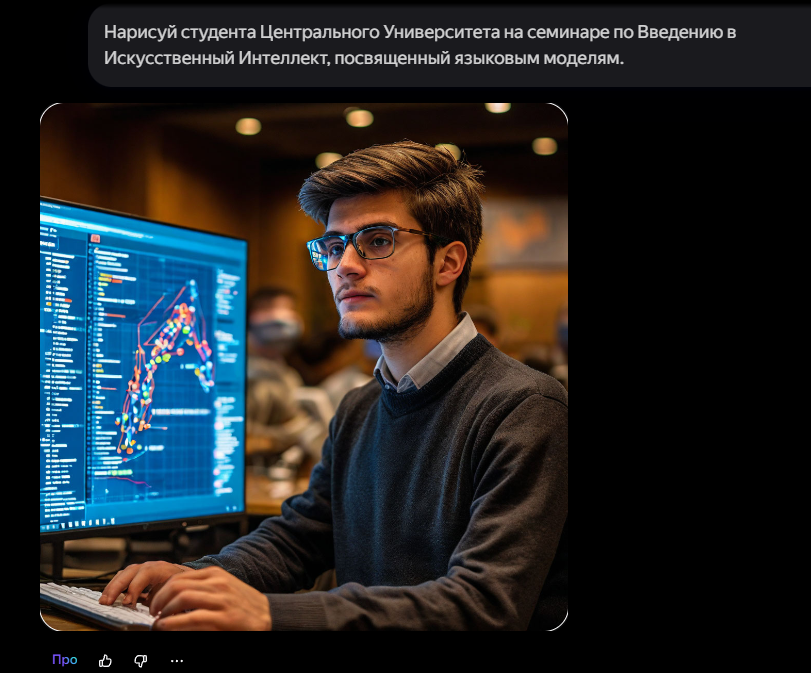

Выглядит неплохо, но не соответствует на 100% запросу. По крайней мере на первом плане картинки теперь студент, а не целая аудитория, как в прошлый раз.

А вот с файлами «Алиса» работать не умеет и картинку с прекрасным котиком не прокомментирует.

Теперь посмотрим, что могут предложить зарубежные сервисы.

### ChatGPT
ChatGPT — чат LLM от OpenAI. На данный момент её модели являются лучшими согласно большинству различных бенчмарков и метрик (даже для русского языка).

Основной недостаток ChatGPT — он недоступен в России, поэтому придётся воспользоваться VPN, благо ЦУ его предоставляет.

В бесплатной версии предоставляется доступ к GPT-4o или GPT-4o Mini (первый вариант лучше, так как там заложена бОльшая модель, но она дороже в использовании). OpenAI не описывает, какую модель в каждый момент времени предоставляет при бесплатной подписке. Но если не отправлять много запросов, то GPT-4o будет доступен для использования.

Что умеет ChatGPT:
* поддерживать беседу в виде чата;
* работать с файлами;
* генерировать картинки.

В общем всё то же самое, что и GigaChat, но только лучше (почему лучше, мы поговорим чуть позже).

Войти/зарегистрироваться можно по Google-аутентификатору.

### 1. Чат

Зададим в чате вопрос про Москву и посмотрим на результаты.

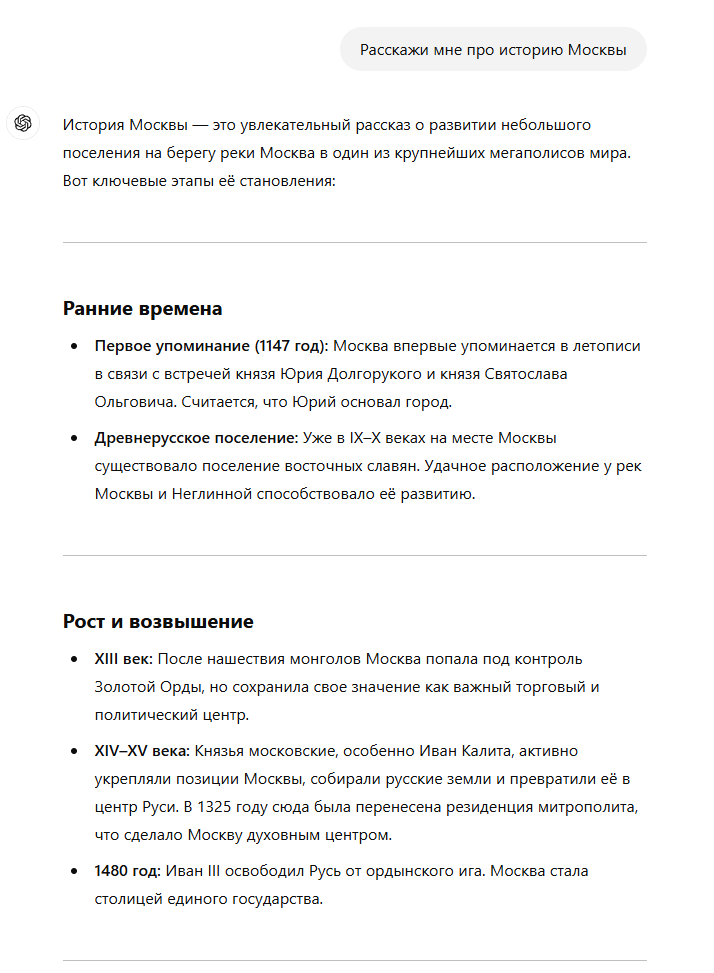

Модель не просто сгенерировала большой и развёрнутый текст, она также его структурировала, добавив пункты и разделение по секциям.

### 2. Работа с файлами

В левой панели выберем ChatGPT, чтобы создать новый чат и чтобы прошлый контекст не повлиял на ответы модели.

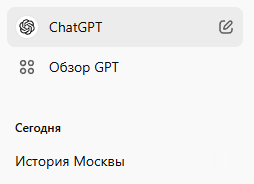

Отправим в чат изображение кота за ноутбуком и снова попросим его описать.

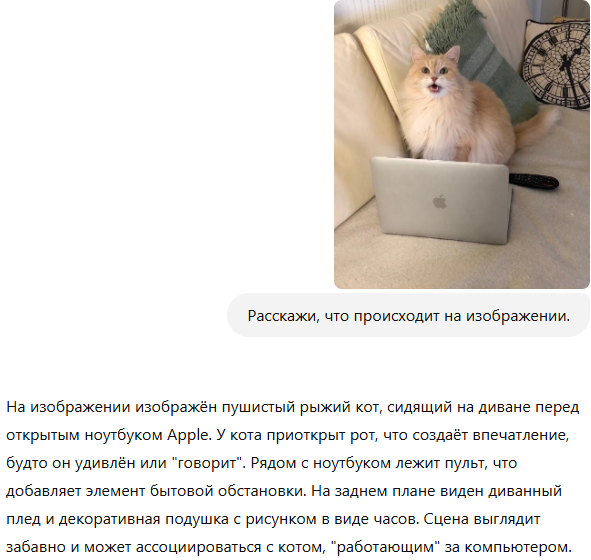

Получилось очень здорово! Модель даже смогла уловить некоторую комичность изображения в том, что кот сидит за компьютером и как будто бы работает.

#### 3. Генерация картинок

Вернёмся к запросу про студента Центрального университета.
Посмотрим на результат генерации.

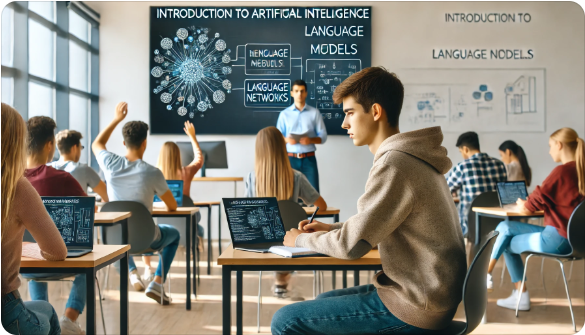

Перед нами аудитория, но на первом плане один конкретный студент. Также на доске видно, что мы находимся на курсе Introduction to Artificial Intelegence, тема — Language Models. Это полностью соответствует нашему запросу.

## Выводы: что использовать?

Мы рассмотрели 3 сервиса, где можно пообщаться с языковыми моделями. Каким лучше пользоваться?

Ответ: **ChatGPT**, который является лучшим для всех языков согласно большинству метрик и бенчмарков.

Что, если хочется пользоваться российскими разработками? Однозначного ответа нет. Существуют различные обзоры моделей с разными текстовыми задачами. По результатам одних обзоров выигрывает GigaChat Max, по результатам других — YandexGPT 4. Так как YandexGPT 5 вышла недавно (на март 2025), сравнения с GigaChat ещё нет. Но есть сравнение c GPT-4o, которому она проигрывает, и «Яндекс» сам это признаёт.

Однако для каждой отдельно взятой задачи модели покажут разное качество, поэтому надо рассматривать оба варианта.

Если интересно, можно ознакомиться с обзорами:

1) [от разработчиков GigaChat](https://habr.com/ru/companies/sberdevices/articles/855368/);

2) [от разработчиков YandexGPT](https://ya.ru/ai/gpt-4);

3) [сравнение GigaChat Max и YandexGPT 4](https://vc.ru/ai/1624756-ekspress-test-yandexgpt-4-i-gigachat-max-novyh-yazykovyh-modelei-ot-yandeksa-i-sbera);

4) [интерактивная визуализация бенчмарка для ChatGPT](https://epoch.ai/data/ai-benchmarking-dashboard).

Также можно попробовать модели:
* [Mistral](https://chat.mistral.ai/) (французская LLM, но по-русски тоже говорит);
* [Claude](https://claude.ai/) (американская, поэтому без VPN не работает и нужна регистрация по нероссийскому номеру телефона, но, говорят, хороша).

## Prompt Engineering

Мы общались с тремя языковыми моделями и отправляли им одинаковые запросы, особо не задумываясь, что конкретно хотим получить. Просто сравнивали результаты между моделями.

Теперь будем писать более осмысленные запросы, которые позволят получать более точные ответы в зависимости от наших желаний.

Такой подход называется prompt engeneering. В нём мы будем давать модели различные подсказки, на основе которых она будет производить генерацию, что улучшит результаты выдачи.

Чтобы добиться лучших результатов:
1. Общайтесь с моделью так, как будто вы говорите с человеком. Чем подробнее вы кому-то что-то объясните, тем точнее он это исполнит.

  Когда вы общаетесь с человеком, разумно ожидать, что он сначала не поймёт вашу точку зрения. Таким образом, естественно дополнять свой рассказ и приводить примеры. Всё это применимо и для чат-моделей.
2. Погружайте модель в контекст. Помимо конкретного вопроса к модели, следует описать, как вы пришли к этому вопросу и зачем вам надо знать на него ответ. Это также поможет модели вернуть наиболее релевантный ответ.
3. Попросите модель принять на себя роль конкретного человека или специалиста в области. Таким образом, вы дадите модели дополнительную информацию, к какой области относится запрос — так в выдаче будет больше конкретики.

Далее в семинаре будем использовать ChatGPT, но вы можете проделать всё то же самое и для любой другой чат-модели.

### 1. Общайтесь с чатом, будто вы говорите с человеком

Вернёмся к вопросу про Москву.

**Вопрос:** «Расскажи мне про историю Москвы».

Как можно доработать этот запрос?

Например, нас не очень интересует история Москвы до начала 20-го века. Наибольший интерес для нас представляет история Москвы во время и немного после Великой русской революции. Попросим модель акцентировать внимание на этих исторических событиях.

**Вопрос теперь имеет вид:** «Расскажи мне про историю Москвы. Но меня не интересуют события до 20-го века. Наибольший интерес для меня представляет история Москвы во время событий Великой русской революции, а также немного после неё (следующие 10 лет).

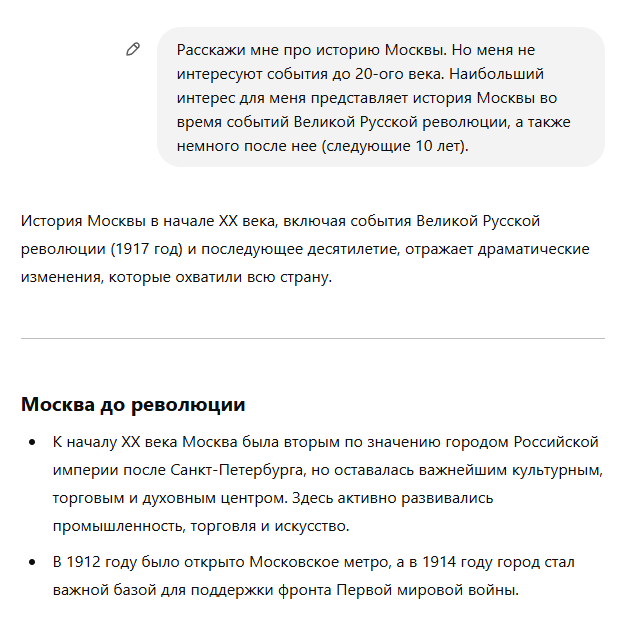

Перед нами неполный вывод ответа. Модель справилась неплохо, но метро открыли не в 1912, а в 1935 году. Это подтверждает слова из начала семинара, что не стоит полностью доверять фактам из сгенерированного текста, даже если он выглядит очень правдоподобно.

### 2. Погружение модели в контекст

Теперь представим, что на уроке истории в школе ко Дню города задали подготовить доклад про Москву. Ученику 8 класса не очень хочется делать его самостоятельно: он считает, что с этим справится и GPT. При этом он переживает, что чат напишет ему очень сложный текст, из-за которого его лень и несамостоятельность раскроют.

**Промпт будет выглядеть:** «Напиши мне доклад в школу про историю Москвы к уроку, посвящённому Дню города. Но только я очень боюсь, что станет известно, что доклад я делал не сам, поэтому используй простые слова, которые может знать школьник в 8-м классе. Также не используй сложных конструкций предложений».

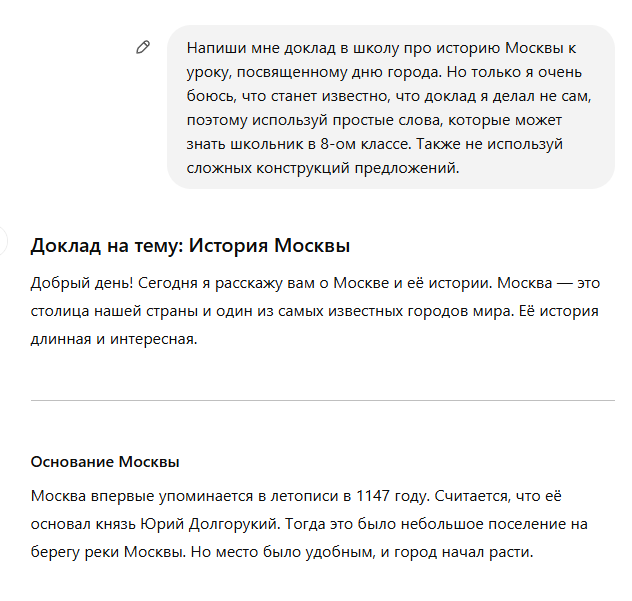

### 3. Просим примерять роль конкретного человека

Попробуем задать модели конкретную роль. Отчасти мы это сделали в прошлом запросе, но теперь посмотрим, как может измениться результат выдачи при смене роли.

Для начала попросим опытнейшего экскурсовода рассказать нам про историю Москвы.

**Вопрос:** «Расскажи мне про историю Москвы, как будто ты один из лучших экскурсоводов, который знает каждый закоулок города».

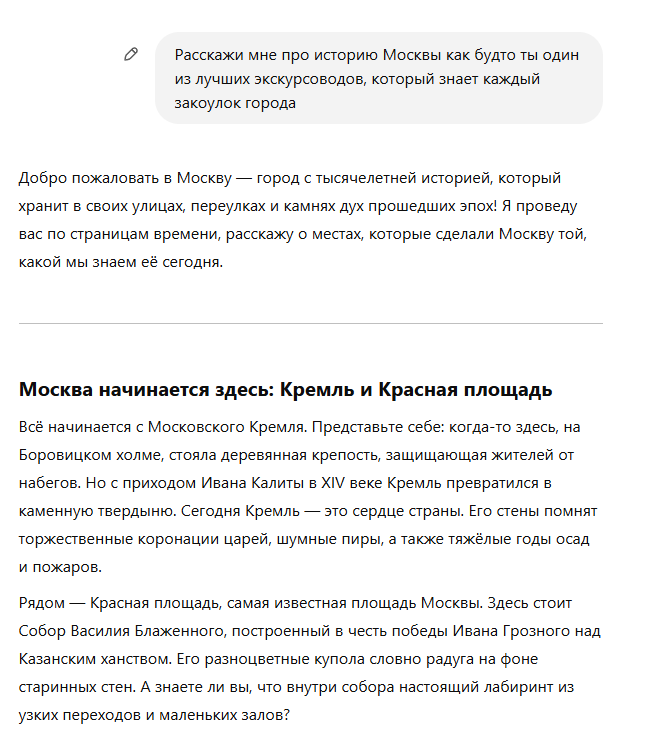

В ответе упоминаются конкретные места, люди и события, с которыми они связаны. Очень похоже на настоящую экскурсию.

Теперь попросим недавно переехавшего в Москву человека рассказать о её истории.

**Вопрос:** «Расскажи про историю Москвы, как будто ты переехал в неё полгода назад».

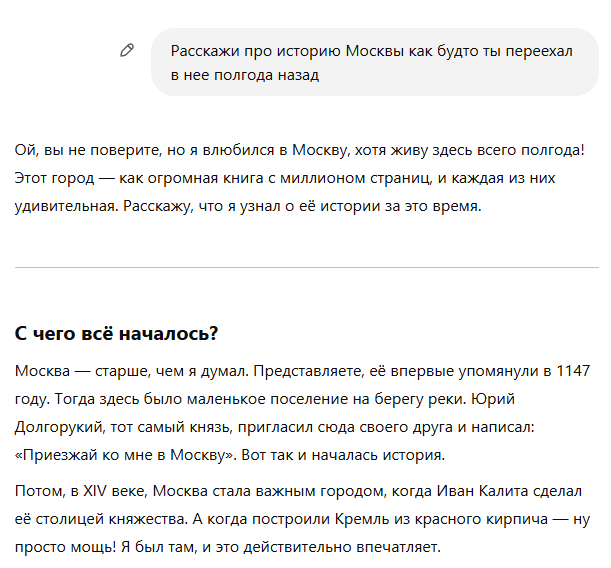

Стиль явно поменялся. Теперь мы общаемся точно не с экскурсоводом. Тем не менее нам попался очень эрудированный собеседник, раз он отсылает нас к письмам Юрия Долгорукого.

### Вывод: всегда подробно описывайте, что вы хотите сделать и что хотите получить на выходе. В таком случае вы получите максимально качественный результат.

## Задача классификации текстов

Мы только что посмотрели, как можно работать с LLM в виде чата. Но что, если нам необходимо решить несложную NLP задачу? Для этого нужен явно не чат.

Разберём решение задачи классификации.

Будем решать задачу классификации русскоязычных постов в «Твиттере» из датасета RuTweetCorp. В нём посты разделены на оскорбительные (negative) и те, где оскорбления отсутствуют (positive).

Сам датасет скачан по ссылке с Kaggle: https://www.kaggle.com/datasets/maximsuvorov/rutweetcorp.

Но также его истоки можно найти в работе «Рубцова Ю. Автоматическое построение и анализ корпуса коротких текстов (постов микроблогов) для задачи разработки и тренировки тонового классификатора // Инженерия знаний и технологии семантического веба. – 2012. – Т. 1. – С. 109-116».

### Общая подготовка данных

Для решения задачи сначала загрузим данные и посмотрим на них.

In [ ]:
# Загрузим файлы нашего датасета с помощью
!gdown 1jRXWqbIxqeC7SXdfzvw5TqUtdbCClVfA
# И распакуем его
!unzip /content/data.zip

In [ ]:
import gc # Пригодится, чтобы ненужные таблички удалить

# Импортируем Pandas, чтобы взглянуть на данные
import pandas as pd

In [ ]:
pos = pd.read_csv('data/positive.csv', index_col=0)
neg = pd.read_csv('data/negative.csv', index_col=0)

In [ ]:
# Взглянем на наш датасет
pos

Помимо текста (ttext) и метки класса (ttype), в датасете присутствует и другая информация о сообщении, например количество ответов на сообщение или количество просмотров.

Эта информация может оказаться важной, но мы хотим сосредоточиться на работе с текстом, поэтому исключим ненужные колонки.

In [ ]:
pos.drop(columns=['tdate', 'tname', 'trep', 'trtw', 'tfav', 'tstcount', 'tfoll', 'tfrien', 'listcount'], inplace=True)
neg.drop(columns=['tdate', 'tname', 'trep', 'trtw', 'tfav', 'tstcount', 'tfoll', 'tfrien', 'listcount'], inplace=True)

In [ ]:
pos

In [ ]:
# Объединим наши таблички с позитивными и негативными комментариями в одну
df = pd.concat([pos, neg])
del pos, neg
gc.collect()

In [ ]:
# Вот такой датасет у нас получился
df

In [ ]:
# Заменим класс −1 на 0, так как именно с таким обозначением работают модели машинного обучения классификации
df['ttype'] = df['ttype'].mask(df['ttype']<0, 0)

Теперь необходимо разделить выборку на обучающую, валидационную и тестовую, для этого нам поможет train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

# Разбиваем выборку на обучающую и валидационно-тестовую
df_train, df_val_test = train_test_split(df, train_size=0.7, random_state=123, shuffle=True, stratify=df['ttype'])
# Разбиваем на валидационную и тестовую
df_val, df_test = train_test_split(df_val_test, train_size=0.5, random_state=123, shuffle=True, stratify=df_val_test['ttype'])
# Удаляем всё ненужное
del df, df_val_test
gc.collect()

Мы произвели первичную обработку данных, теперь перейдём к решению задачи различными методами.

### TF-IDF

Сначала необходимо перевести тексты в численное представление. Самый простой способ это сделать — посчитать вхождения различных слов в каждый текст и представить данные в формате «количество текстов на количество наблюдений».

Но, как обсуждалось на лекции, с сырыми текстами так лучше не делать, так как это приводит к росту словаря уникальных слов. То есть размерность данных станет огромной, поэтому необходимо:

1) привести все слова к нижнему регистру;

2) удалить знаки препинания, различные символы и числительные;

3) удалить стоп-слова (предлоги, союзы, частицы);

4) лемматизировать слова;

5) удалить редко встречающиеся слова, так как это могут быть просто описки.


#### 1. Приведём все слова к нижнему регистру

Для этого понадобится одна функция.

In [ ]:
df_train['ttext'] = df_train['ttext'].str.lower()
df_val['ttext'] = df_val['ttext'].str.lower()
df_test['ttext'] = df_test['ttext'].str.lower()

####2. Удаление знаков препинания, числительных и спецсимволов

Воспользуемся регулярными выражениями, которые уже удобно встроены в Pandas.

In [ ]:
# Сначала удалим спецсимволы \n, \t, \r
# В регулярке написано: \n, или \t, или \r
df_train['ttext'] = df_train['ttext'].str.replace('\\n|\\t|\\r', ' ', regex=True)
df_val['ttext'] = df_val['ttext'].str.replace('\\n|\\t|\\r', ' ', regex=True)
df_test['ttext'] = df_test['ttext'].str.replace('\\n|\\t|\\r', ' ', regex=True)

In [ ]:
# Теперь можно удалить знаки препинания и числительные
# В регулярке написано: «Оставь мне только маленькие буквы на английском и русском»
df_train['ttext'] = df_train['ttext'].str.replace('[^a-zа-я]', ' ', regex=True)
df_val['ttext'] = df_val['ttext'].str.replace('[^a-zа-я]', ' ', regex=True)
df_test['ttext'] = df_test['ttext'].str.replace('[^a-zа-я]', ' ', regex=True)

In [ ]:
# Всё почистили
df_train

#### 3. Удаление стоп-слов

Стоп-слова для русского языка содержатся в библиотеке NLTK. Загрузим их и применим для очистки текстов.

In [ ]:
# Импортируем пакет NLTK и подгружаем модуль stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
# Загружаем русские стоп-слова
s_words = set(stopwords.words('russian'))

Надо написать функцию, которая разделяет нашу строку на список по пробелам, а потом собирает в новую строку, в которой нет стоп-слов.

In [ ]:
# Для решения
# Создаём функцию для удаления стоп-слов
def remove_stopwords(s: str):
  # Делим строку на список
  # Фильтруем от стоп-слов
  return # Собираем обратно в строку и возвращаем

In [ ]:
# Применяем к нашим данным функцию
df_train['ttext'] = df_train['ttext'].apply(remove_stopwords)
df_val['ttext'] = df_val['ttext'].apply(remove_stopwords)
df_test['ttext'] = df_test['ttext'].apply(remove_stopwords)

In [ ]:
# Готово
df_train

#### 4. Лемматизация

Напоминаю, лемматизация — это процесс приведения слова к его начальной форме, а именно:
* к единственному числу,
* мужскому роду,
* инфинитиву (для глаголов).

В этом поможет пакет pymystem3.

In [ ]:
from pymystem3 import Mystem

In [ ]:
# Создадим экземпляр класса нашего лемматизатора
mystem = Mystem()

In [ ]:
# Напишем функцию для лемматизации наших данных
def lemmatize(s: str):
  return ' '.join(mystem.lemmatize(s))

In [ ]:
# Применим к датасету. Работает немного долго (2 минуты 20 секунд), можно существенно ускорить, если собрать весь датасет в длинную строку, лемматизировать, а потом обратно разбить, но тогда могут быть проблемы с оперативной памятью
# Это особенность пакета. Он довольно медленный
# В конце ещё раз \n удаляем, потому что pymystem3 его зачем-то добавляет
df_train['ttext'] = df_train['ttext'].apply(lemmatize).str.replace('\n', '')
df_val['ttext'] = df_val['ttext'].apply(lemmatize).str.replace('\n', '')
df_test['ttext'] = df_test['ttext'].apply(lemmatize).str.replace('\n', '')

In [ ]:
df_train

In [ ]:
# Уберём все пробелы в начале и конце строк, а также оставим только одинарные пробелы
df_train['ttext'] = df_train['ttext'].str.replace(' +', ' ', regex=True).str.strip()
df_val['ttext'] = df_val['ttext'].str.replace(' +', ' ', regex=True).str.strip()
df_test['ttext'] = df_test['ttext'].str.replace(' +', ' ', regex=True).str.strip()

Мы получили практически готовый датасет! «А как же удаление редких слов?» — спросите вы.

Реализация алгоритма TF-IDF в библиотеке Sklearn поддерживает удаление наиболее редко встречающихся слов. То есть нам необходимо задать нужное число как гиперпараметр.

### Получение TF-IDF эмбеддингов



In [ ]:
# Импортируем TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Инициализируем класс нашего векторизатора и зададим параметр (min_df), который отвечает за удаление наименее частотных слов
vectorizer = TfidfVectorizer(min_df=10)

In [ ]:
# Для решения
# Обучи tf_idf на train, а затем примени к val и test
train_tfidf = vectorizer. # Твой код
val_tfidf = vectorizer. # Твой код
test_tfidf = vectorizer. # Твой код

In [ ]:
# У нас получилось, что размерность нашего текста составляет 11 468, что точно не мало, но и не супермного. Пока оставим это так
train_tfidf

In [ ]:
# Теперь импортируем модель, которая будет решать нашу задачу. Это будет бустинг (как наиболее сильная модель для табличных данных) из пакета lightgbm
from lightgbm import LGBMClassifier

# И ещё нам NumPy пригодится
import numpy as np

In [ ]:
# Для решения
model_tfidf = # Инициализируйте модель
model_tfidf.fit() # Обучи модель
train_pred_tfidf = model_tfidf.predict() # Получи предсказания для train, val и test
val_pred_tfidf = model_tfidf.predict()
test_pred_tfidf = model_tfidf.predict()

In [ ]:
# Для оценки результатов мы будем использовать метрику Accuracy
from sklearn.metrics import accuracy_score

In [ ]:
# Посмотрим на результаты нашего обучения
print(f'Точность предсказания для обучающей выборки составляет {accuracy_score(df_train["ttype"].values, train_pred_tfidf)*100}%')
print(f'Точность предсказания для валидационной выборки составляет {accuracy_score(df_val["ttype"].values, val_pred_tfidf)*100}%')
# А на тестовую выборку посмотрим в самом конце. Идея тестовой выборки как раз в этом и заключается

Что нам могут сказать эти цифры?

Цифры довольно близки между собой. Качество на обучающей выборке немного лучше, чем на валидационной, - это говорит о небольшом переобучении. Тем не менее расхождение цифр пока небольшое. Возможно, имеет смысл поставить больше деревьев, а не использовать дефолтные 100. Тогда и качество может стать лучше. Но пока оставим так. Далее улучшение качества решения зависит от перебора гиперпараметров - это вы уже умеете.

## HF-эмбеддинги

HF (Hugging Face) — сайт, где хранится огромное множество моделей машинного обучения, в частности языковых, которые можно удобно использовать с помощью пакета transformers.

Мы получим эмбеддинги из этих моделей и попробуем их опять классифицировать нашим бустингом.

Для этого задания нам необходим GPU, поэтому придётся перезапустить среду. Все нужные обработанные датасеты сохранены на «Google Диске», мы их снова быстро подгрузим.

Перед тем как продолжить обязательно включи GPU среду. Запусти следующую ячейку для установки numpy версии до 2. Среда сама перезапустится, это необходимо, чтобы импортировалась нужная версия numpy.



In [ ]:
# Установим numpy версии до 2.0, это без этого потом будут проблемы
!pip install "numpy==1.26.4"

# Перезапускаем среду, чтобы новые версии пакетов можно было использовать, все файлы сохранятся
import os
os.kill(os.getpid(), 9)

In [ ]:
# Опять импортируем нужные пакеты
import torch

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

from lightgbm import LGBMClassifier

In [ ]:
# Подгружаем данные
!gdown 1gb2_JV3ZcOV-cjUomavBuS7DUOdt2QkJ
# И распакуем его
!unzip /content/prep_data.zip

# Загружаем переменные
df_train = pd.read_parquet('/content/train_prep.parquet')
df_val = pd.read_parquet('/content/val_prep.parquet')
df_test = pd.read_parquet('/content/test_prep.parquet')
# Мы готовы работать дальше!

Используем модель rubert-tiny-toxisity. Это трансформер, обученный на комментариях специально для задачи классификации комментариев на оскорбительные (несколько разных классов) и нет.

Она доступна по [ссылке](https://huggingface.co/cointegrated/rubert-tiny-toxicity).


Наверху справа нажимаем Use this model. Появляется окно, из которого можно скопировать код для загрузки.

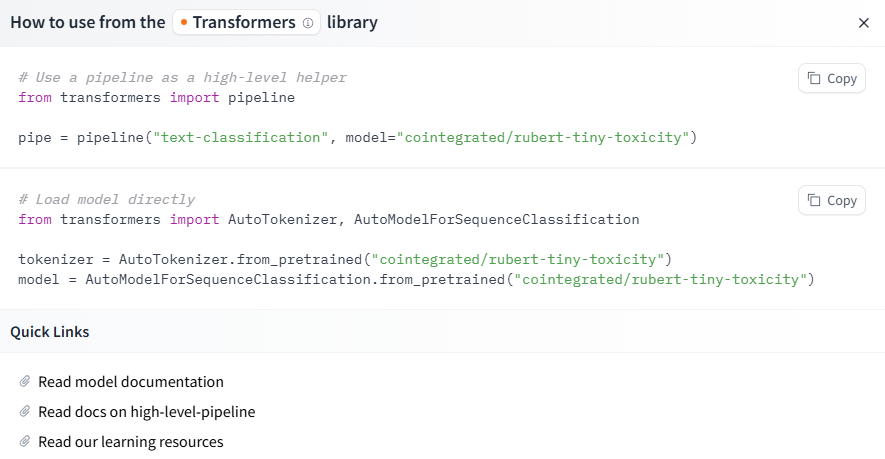

Для начала определим, как будем приводить текст к численному виду. В этом поможет класс AutoTokenizer из библиотеки Transformers.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny-toxicity")
model = AutoModelForSequenceClassification.from_pretrained("cointegrated/rubert-tiny-toxicity")

In [ ]:
# Что нам вернёт токенайзер, если подать в него текст?
# 1. input_ids — индексы токенов, которые мы достали из матрицы эмбеддингов
# 2. token_type_ids — маска, к какой последовательности относится токен, если мы подаём на вход больше одной последовательности
# 3. attention_mask — маска, которая говорит, есть токен или нет. Но почему там одни единицы?
tokenizer(df_train['ttext'].iloc[0])

In [ ]:
# Зададим параметры нашего токенайзера
tokenizer(df_train['ttext'].iloc[0],
          padding='max_length', # Хотим, чтобы все последовательности были одной длины, это нужно для корректной работы нейросети (так как все последовательности в батче должны быть одной длины), поэтому будем делать падинг до максимальной длины пустыми токенами
          max_length=64,  # Наша максимальная длина последовательности
          truncation=True, # Если максимальная длина превышена, обрезаем последовательность
          return_tensors="pt") # Хотим вернуть в формате PyTorch

# Вот и нули в маске появились

Теперь приведём датасет к виду, с которым будет работать нейросеть. Для этого потребуется класс Dataset, с которым вы уже знакомы.

Напиши класс нашего датасета для обучения. Он должен возвращать словарь с input_ids, token_type_ids, attention_mask. То есть к нашим текстам надо просто применить tokenizer. Сделать это можно двумя способами:
1. Во время инициализации датасета. Тогда вся информация сохранится в память и может занять там существенную часть. Зато сможем быстро получать элементы.
2. Применять tokenizer в методе getitem. Экономит память, но будет работать дольше.

У нас датасет не очень большой, так что сделай, как в пункте 1, но помни, что возможны варианты, описанные выше.

In [ ]:
from torch.utils.data import Dataset

In [ ]:
# Для решения
class TwitterDataset(Dataset):
    def __init__(self, texts):

      self.texts = # Список, где каждый элемент пропускается через токенайзер

    def __len__(self):
        return len(self.texts)


    def __getitem__(self, idx):

        X = # Получаем нужный элемент по индексу

        return X

Сделаем датасеты.

In [ ]:
ds_train = TwitterDataset(df_train['ttext'].values)
ds_val = TwitterDataset(df_val['ttext'].values)
ds_test = TwitterDataset(df_test['ttext'].values)

Сделаем DataLoaders, чтобы подавать наши данные в модель.

In [ ]:
from torch.utils.data import DataLoader
dl_train = DataLoader(ds_train, batch_size=128, shuffle=False, num_workers=2) # train не надо перемешивать сейчас, потому что мы просто получаем эмбеддинги, чтобы обучать бустинг на них. Если перемешаем, не получится соотнести целевые метки с данными
dl_val = DataLoader(ds_val, batch_size=128, shuffle=False, num_workers=2)
dl_test = DataLoader(ds_test, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
# Работает
for X in dl_train:
  break

X

Теперь посмотрим на нашу модель.

In [ ]:
model

Надо удалить последний слой, так как он был нужен для задачи, где 5 классов, а у нас их 2. Будем работать с 312 фичами.

In [ ]:
# Можно не совсем удалять, а просто перезаписать
model = model.bert

In [ ]:
model

Пришло время получить эмбеддинги. Для этого напишем функцию.

In [ ]:
from tqdm import tqdm # Пригодится для progress bar

# Определим наш device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def get_bert_embs(dataloader):
  embs = []
  for X in tqdm(dataloader, total=len(dataloader)):
    batch_inputs = X['input_ids'].squeeze(1).to(device)
    batch_masks = X['attention_mask'].squeeze(1).to(device)
    embs.append(model(batch_inputs, batch_masks).last_hidden_state[:,0,:].detach().cpu().numpy()) # Берём эмбеддинг 1-го токена, потому что это токен, в который модель обучена кодировать всё самое важное
  return np.concatenate(embs)

Переведём модель в режим инференса и получим эмбеддинги для дальнейшей классификации.

In [ ]:
# Переходим в режим инференса
model.eval()
# Перекладываем модель на нужное устройство
model.to(device)
# И получаем наши эмбеддинги
train_bert = get_bert_embs(dl_train)
val_bert = get_bert_embs(dl_val)
test_bert = get_bert_embs(dl_test)
# На CPU работало бы 35 минут

Снова обучим бустинг и посмотрим на результаты.

In [ ]:
model_bert = LGBMClassifier()

# Обучим модель и получим предсказания для валидационной и тестовой выборки
model_bert.fit(train_bert, df_train['ttype'].values)
train_pred_bert = model_bert.predict(train_bert)
val_pred_bert = model_bert.predict(val_bert)
test_pred_bert = model_bert.predict(test_bert)

In [ ]:
# Посмотрим на результаты нашего обучения
print(f'Точность предсказания для обучающей выборки составляет {accuracy_score(df_train["ttype"].values, train_pred_bert)*100}%')
print(f'Точность предсказания для валидационной выборки составляет {accuracy_score(df_val["ttype"].values, val_pred_bert)*100}%')
# А на тестовую выборку посмотрим в самом конце. Идея тестовой выборки как раз в этом и заключается

## Выбор лучшей модели

Настал момент истины. Мы получили модели, обучили их, получили предсказания и посмотрели на валидации, какое значение метрики они выбивают.

Теперь надо выбрать лучшую модель по валидации, сделать предсказание на тестовую часть выборки и проверить, оказались ли мы правы в выборе модели.

Договоримся, что наш фаворит — это модель, полученная из TF-IDF эмбеддингов, так как на валидации она показала наилучшее качество.

In [ ]:
print(f'Точность предсказания для тестовой выборки для TF-IDF составляет {accuracy_score(df_test["ttype"].values, df_test["pred_tfidf"].values)*100}%')
print(f'Точность предсказания для тестовой выборки для HF составляет {accuracy_score(df_test["ttype"].values, test_pred_bert)*100}%')

Так и оказалось на тестовой выборке — мы оказались правы.

Тем не менее странно получилось, что могучий искусственный интеллект в лице нейросети показал качество хуже простого TF-IDF. Почему так вышло, ты узнаешь в домашнем задании.

### Эмбеддинги из Gensim
Gensim — библиотека, изначально разработанная для решения задачи тематического моделирования. Но на данный момент её назначение несколько шире.

Одно из полезных её свойств — она содержит различные эмбеддинги, предобученные такими методами, как Word2Vec, FasText, Glove и другими.

Рассмотрим, как из неё загрузить необходимые эмбеддинги и воспользоваться ими для решения задачи классификации.

In [ ]:
pip install gensim --quiet

In [ ]:
# Импортируем загрузчик моделей
import gensim

Эмбеддинги будем загружать с сайта https://rusvectores.org/ru/models/. Там есть множество различных эмбеддингов, возьмём самые маленькие по размеру.

Мы уже их заранее скачали и положили на диск, теперь их надо загрузить в ноутбук.

In [ ]:
!gdown 1v1xDbb1j8WiAuW7yuIky6-v7f1AlCYuU
!gunzip '/content/ruscorpora_upos_skipgram_300_5_2018.vec.gz'

In [ ]:
# Определим нашу модель для получения эмбеддингов
model = gensim.models.KeyedVectors.load_word2vec_format('/content/ruscorpora_upos_skipgram_300_5_2018.vec')

Данная модель принимает слова в формате «слово_часть речи». Поэтому придётся её немного подогнать под наши данные.

Существуют и другие модели, где не надо задавать части речи, но самые популярные модели для русского языка созданы проектом RusVectors, который работает со словами в формате, как указано выше. Поэтому приведём наш датасет к подходящему виду. В этом поможет pymystem3.

Другие эмбеддинги проекта можно найти по [ссылке](https://rusvectores.org/ru/models/).



In [ ]:
# pymystem3 размечает не в совсем верном формате, нам надо его преобразовать к формату токенов в датасете, для этого воспользуемся словарём
pos_dct = {
    'A': 'ADJ',
    'ADV': 'ADV',
    'ADVPRO': 'ADV',
    'ANUM': 'ADJ',
    'APRO': 'DET',
    'COM': 'ADJ',
    'CONJ': 'SCONJ',
    'INTJ': 'INTJ',
    'NONLEX': 'X',
    'NUM': 'NUM',
    'PART': 'PART',
    'PR': 'ADP',
    'S': 'NOUN',
    'SPRO': 'PRON',
    'UNKN': 'X',
    'V': 'VERB'
}

In [ ]:
# Напишем функцию, которая из пакета pymystem3 достаёт части речи и конкатенирует их с самим словом
# Просто из словаря и строки в нём, которую выдаёт pymystem3, достаём нужную информацию, можете особо не разбираться, что здесь происходит
def tag(s: str):
  processed = mystem.analyze(s)
  new_s = []
  for el in processed:
    if el['text'] == ' ' or el['text']== '\n' or not el['analysis']:
      continue
    pos = el['analysis'][0]['gr'].split(',')[0].split('=')[0]
    new_s.append(el['text'] + '_' + pos_dct[pos])
  return ' '.join(new_s)

In [ ]:
# Создадим копию нашего датасета, чтобы не портить его разметкой для Gensim-эмбеддингов
df_train_pos = df_train.copy()
df_val_pos = df_val.copy()
df_test_pos = df_test.copy()

In [ ]:
from pymystem3 import Mystem
# Создадим экземпляр класса нашего лемматизатора
mystem = Mystem()

In [ ]:
# И применим нашу функцию
# Работает 2,5 минуты
df_train_pos['ttext'] = df_train_pos['ttext'].apply(tag)
df_val_pos['ttext'] = df_val_pos['ttext'].apply(tag)
df_test_pos['ttext'] = df_test_pos['ttext'].apply(tag)

In [ ]:
df_train_pos

Мы получили датасет в нужном формате. Теперь получим из него эмбеддинги. Для этого необходимо взять среднее между эмбеддингом каждого слова в предложении. Напишем для этого функцию.

In [ ]:
# Для решения
# Функция для получения эмбеддинга предложения
def get_sent_embs(sent: str):
  vecs = # Куда будем складывать эмбеддинги каждого слова
  sent = # Раздели предложение на слова
  for s in sent: # Идём по словам
    # Здесь должно быть какое-то условие, подумай над ним или сначала попробуй применить функцию, увидишь ошибку и поймёшь всё
      model.get_vector('Сюда надо что-то вписать') # Этой функцией достаём наши эмбеддинги для слова
  return # Находим среднее наших эмбеддингов

In [ ]:
# Работает
get_sent_embs(df_train_pos['ttext'].iloc[0]).shape

Теперь применим функцию к нашему датасету.

In [ ]:
df_train_pos['embs'] = df_train_pos['ttext'].apply(get_sent_embs)
df_val_pos['embs'] = df_val_pos['ttext'].apply(get_sent_embs)
df_test_pos['embs'] = df_test_pos['ttext'].apply(get_sent_embs)

Здесь возникает проблема, что для некоторых предложений получаются пустые эмбеддинги, то есть мы не смогли получить векторное представление для текста. Это связано с тем, что ни один токен не был найден в словаре. Такое бывает.
Отчасти эту проблему можно решить, взяв больший словарь или другую модель. Таких наблюдений немного, давайте их просто исключим.

In [ ]:
df_train_pos.dropna(inplace=True)
df_val_pos.dropna(inplace=True)
df_test_pos.dropna(inplace=True)

Пора обучить нашу модель.

In [ ]:
model_gen = LGBMClassifier()

# Обучим модель и получим предсказания для валидационной и тестовой выборки
model_gen.fit(np.stack(df_train_pos['embs'].values, axis=0), df_train_pos['ttype'].values)
train_pred_gen = model_gen.predict(np.stack(df_train_pos['embs'].values, axis=0))
val_pred_gen = model_gen.predict(np.stack(df_val_pos['embs'].values, axis=0))
test_pred_gen = model_gen.predict(np.stack(df_test_pos['embs'].values, axis=0))

In [ ]:
# Посмотрим на результаты нашего обучения
print(f'Точность предсказания для обучающей выборки составляет {accuracy_score(df_train_pos["ttype"].values, train_pred_gen)*100}%')
print(f'Точность предсказания для валидационной выборки составляет {accuracy_score(df_val_pos["ttype"].values, val_pred_gen)*100}%')
# А на тестовую выборку посмотрим в самом конце. Идея тестовой выборки как раз в этом и заключается

In [ ]:
# Посмотрим на качество для теста
print(f'Точность предсказания для тестовой выборки для Gensim составляет {accuracy_score(df_test_pos["ttype"].values, df_test_pos["pred_tfidf"].values)*100}%')

Точность для тестовой выборки подросла, а для валидационной снизилась. О чём это может говорить?

В этот раз мы переобучились. Можно ещё поиграться с параметрами и получить качество лучше, но сейчас работает не лучше TF-IDF.

С чем это может быть связано?

Загруженные эмбеддинги не подходят под нашу задачу. Русский язык русскому языку рознь. Наш датасет содержит в себе комментарии из «Твиттера», а загруженные эмбеддинги получены из [НКРЯ](https://ruscorpora.ru/). В первом случае используется разговорная речь, во втором случае — официальная/научная.

Чтобы с этим справиться, можно:
* поискать менее популярные эмбеддинги, но подходящие под задачу;
* взять эмбеддинги, где словарь и корпус текстов, на котором они обучались, побольше;
* выучить эмбеддинги самому, но для этого надо очень много текстов.

In [ ]:
# При желании методами Gensim можно выучить собственные эмбеддинги
# Но с появлением трансформеров, с помощью которых можно учить более качественные эмбеддинги, это не так актуально
# Тем не менее вот пример кода:
from gensim.models import Word2Vec
model = Word2Vec(df_train['ttext'].map(lambda x: x.split()),
                 vector_size=32,
                 min_count=5,
                 window=5).wv

In [ ]:
model.get_vector('привет')

## Теперь ты умеешь
- Общаться с LLM.
- Писать промпты при обращении к LLM.
- Получать эмбеддинги для решения простой задачи классификации.